# Exploratory Analysis On Data Science Job Salaries

Introduction: Data science jobs are some of the fastest-growing, most in-demand in technology Job in recent 	   years. Data Science is an interdisciplinary academic field that uses Statistics, Scientific computing, Scientific 		Methods, Processes, Algorithms and Systems to extract or extrapolate knowledge and insights from noisy, 		   structured and unstructured data

Goal: Our aim is to as much as possible, draw possible insights into the Features provided in the Dataset

### Features In Dataset and their meanings

- work_year: The year the salary was paid
- experience_level: The experience level in the job during the year with the following possible values:
--		EN Entry-level / Junior  
--		MI Mid-level / Intermediate 
--		SE Senior-level / Expert 
--		EX Executive-level / Director
- employment_type: The type of employement for the role: 
--		PT Part-time 
--		FT Full-time 
--		CT Contract FL Freelance
- job_title: The role worked in during the year 
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely, possible values are as follows:
--		0 No remote work (less than 20%) 
--		50 	Partially remote 
--		100 Fully remote (more than 80%).
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year:
--		S less than 50 employees (small)
--		M 50   to 250 employees (medium) 
--		L more than 250 employees (large)



In [1]:
pwd()

'C:\\Users\\alight\\Documents\\MY PROJECT PORTFOLIO\\PYTHON'

In [2]:
#import python libraries for data manipulation and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [4]:
# read the dataset
ds_data = pd.read_csv(r"C:\Users\ds_salaries.csv")

ds_data.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [5]:
# remove the unnamed column to avoid redundancy 

ds_data.drop(['Unnamed: 0'], axis=1, inplace=True)

ds_data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


### Data Inspection 

In [6]:
#inspect the data
print("There are  {0} Rows and {1} Columns data".format(ds_data.shape[0],ds_data.shape[1]))

There are  607 Rows and 11 Columns data


In [7]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
# explore the unique values in each column
ds_data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [9]:
ds_data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [10]:
ds_data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [11]:
ds_data['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [12]:
ds_data['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [13]:
ds_data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [14]:
ds_data['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [15]:
ds_data['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [16]:
# Check unique values in categorical variables only

unique_category  = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for i in unique_category:
    print('Unique values in ' + i + ' : ' + str(ds_data[i].unique()))
    print('\n')

print ('\nNumber of unique values in Categorical variables:\n')
print (ds_data[unique_category].nunique())

Unique values in experience_level : ['MI' 'SE' 'EN' 'EX']


Unique values in employment_type : ['FT' 'CT' 'PT' 'FL']


Unique values in job_title : ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Dev

In [17]:
ds_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [18]:
ds_data.describe().astype(int)

,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607
mean,2021,324000,112297,70
std,0,1544357,70957,40
min,2020,4000,2859,0
25%,2021,70000,62726,50
50%,2022,115000,101570,100
75%,2022,165000,150000,100
max,2022,30400000,600000,100


In [19]:
ds_data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


### Summary of Findings

- The Dataset contains 607 records and 12 features.
- There are no missing values in the dataset.
- Unnamed column is not useful for our analysis (Dropped column).
- Data contains values from 2020 to 2022 Work Year
- There are 4 unique experience levels with SE occuring 280 times.
- The Dataset contains 4 employment types; FT (Full time employment) is the most common type occurring 588 instances).
- There are 50 unique job titles.
- Salary is recorded in 17 different currencies.
- The average salary in USD is 112,297.87
- Employees are resident in 57 locations while the Companies are located in 50 locations.
- The US contains the most Data Science professionals and companies with 332 professionals and 355 companies resident in the US.

# Data Visualization

### Univariate Analysis

In [20]:
sns.set()

<Axes: >

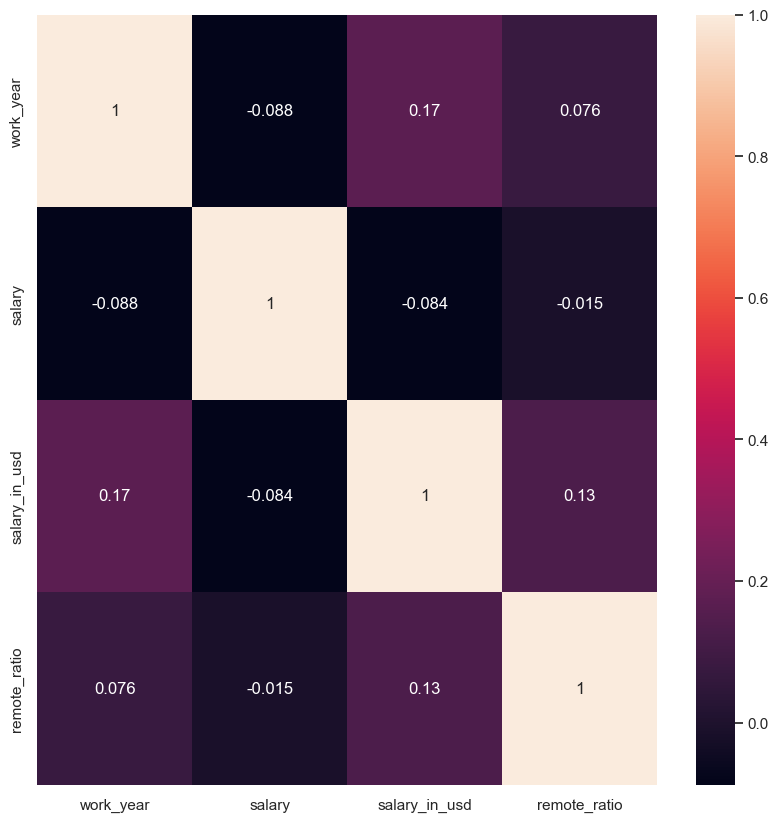

In [21]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(10,10))
sns.heatmap(ds_data.corr(), annot=True)

In [22]:
# Rename Experience level values

ds_data.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)


Text(0, 0.5, 'COUNT')

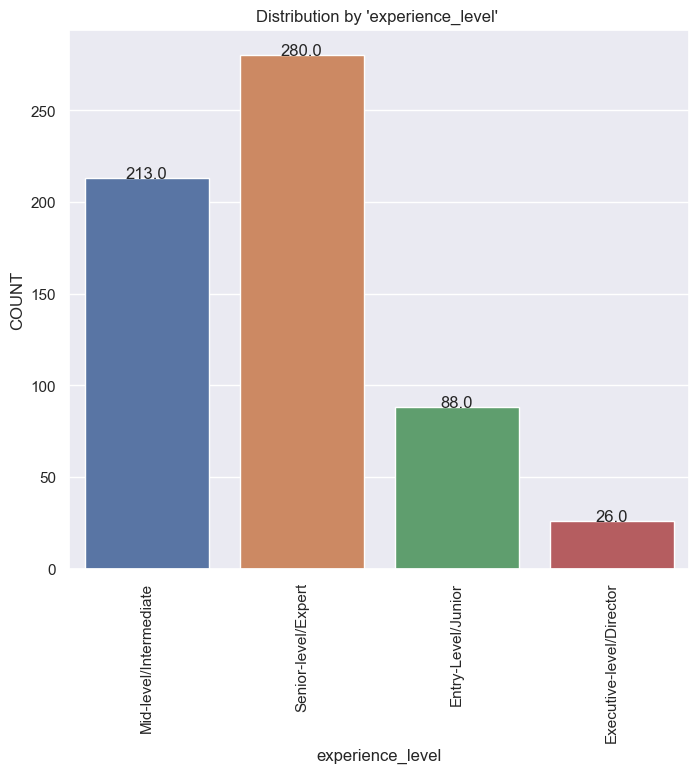

In [23]:
# Distribution of experience Level
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='experience_level', data=ds_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'experience_level' ")
plt.ylabel('COUNT')


In [24]:
# Percentage of Distribution by experience level
experience_perct = (ds_data['experience_level'].value_counts()/ds_data.shape[0]*100).round(2)
experience_perct


Senior-level/Expert         46.13
Mid-level/Intermediate      35.09
Entry-Level/Junior          14.50
Executive-level/Director     4.28
Name: experience_level, dtype: float64

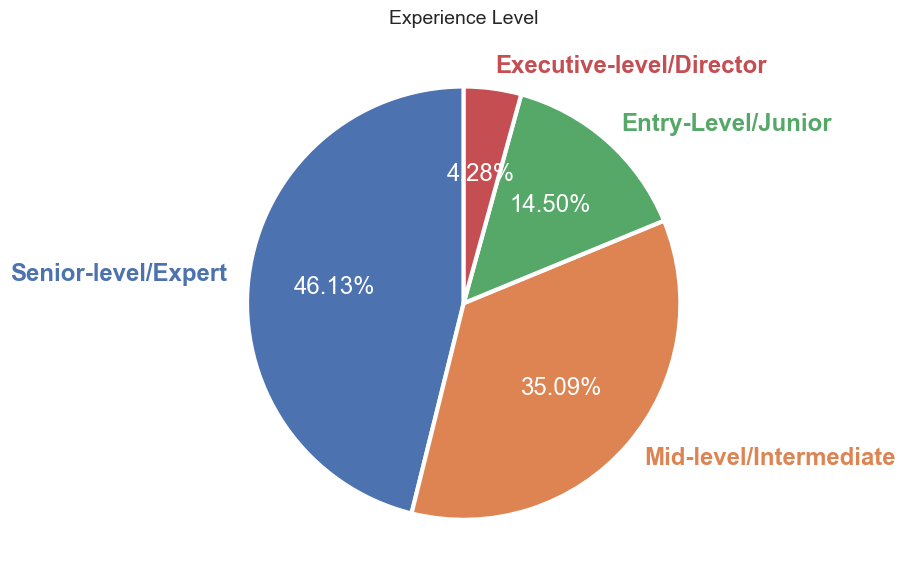

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
x=experience_perct

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=14)
plt.tight_layout()

### The above shows that:

Intermediate SE Senior-level experience are  46% while those with,Junior MI Mid-level experience are 35%, the EN Entry-level are  14% and the Expert EX Executive-level are 4.28%.


In [26]:
# Rename Employment Type values
ds_data.employment_type.replace({'PT':'Part-time','FT':'Full-time','CT':'Contract','FL':'Freelance'}, inplace=True)

Text(0, 0.5, 'COUNT')

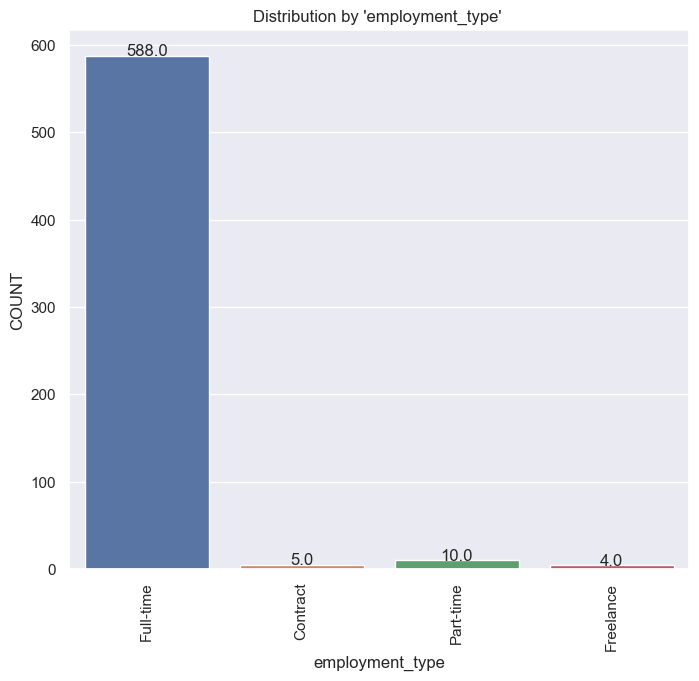

In [27]:
# Distribution of Employment Type
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='employment_type', data=ds_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'employment_type' ")
plt.ylabel('COUNT')

In [28]:
# Percentage of Distribution by employment type
(ds_data['employment_type'].value_counts()/ds_data.shape[0]*100).round(2)

Full-time    96.87
Part-time     1.65
Contract      0.82
Freelance     0.66
Name: employment_type, dtype: float64

### The Above data shows that:

97% of the data are Full-Time FT workers, while 1.7 are Part-Time PT workers. The remaining, who are Contract CT workers and Freelance FL workers share a tiny percentage of 0.8 and 0.7% respectively.

Text(0, 0.5, 'COUNT')

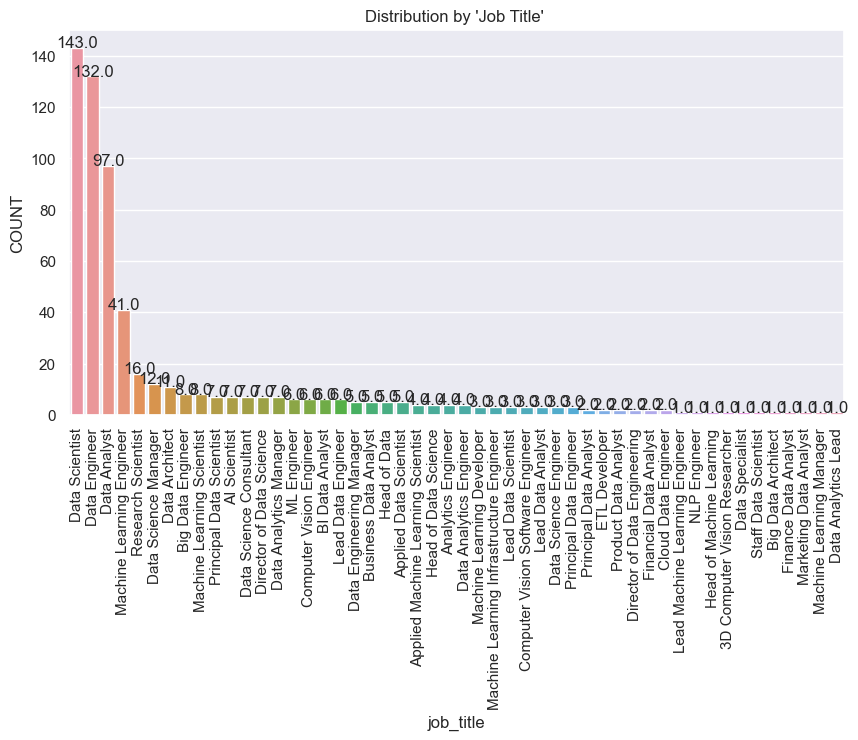

In [29]:
# Distribution of Job Title
fig, ax1 = plt.subplots(figsize = (10,5))
viz = sns.countplot(ax=ax1, x='job_title', data=ds_data, order=ds_data['job_title'].value_counts().index)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'Job Title' ")
plt.ylabel('COUNT')

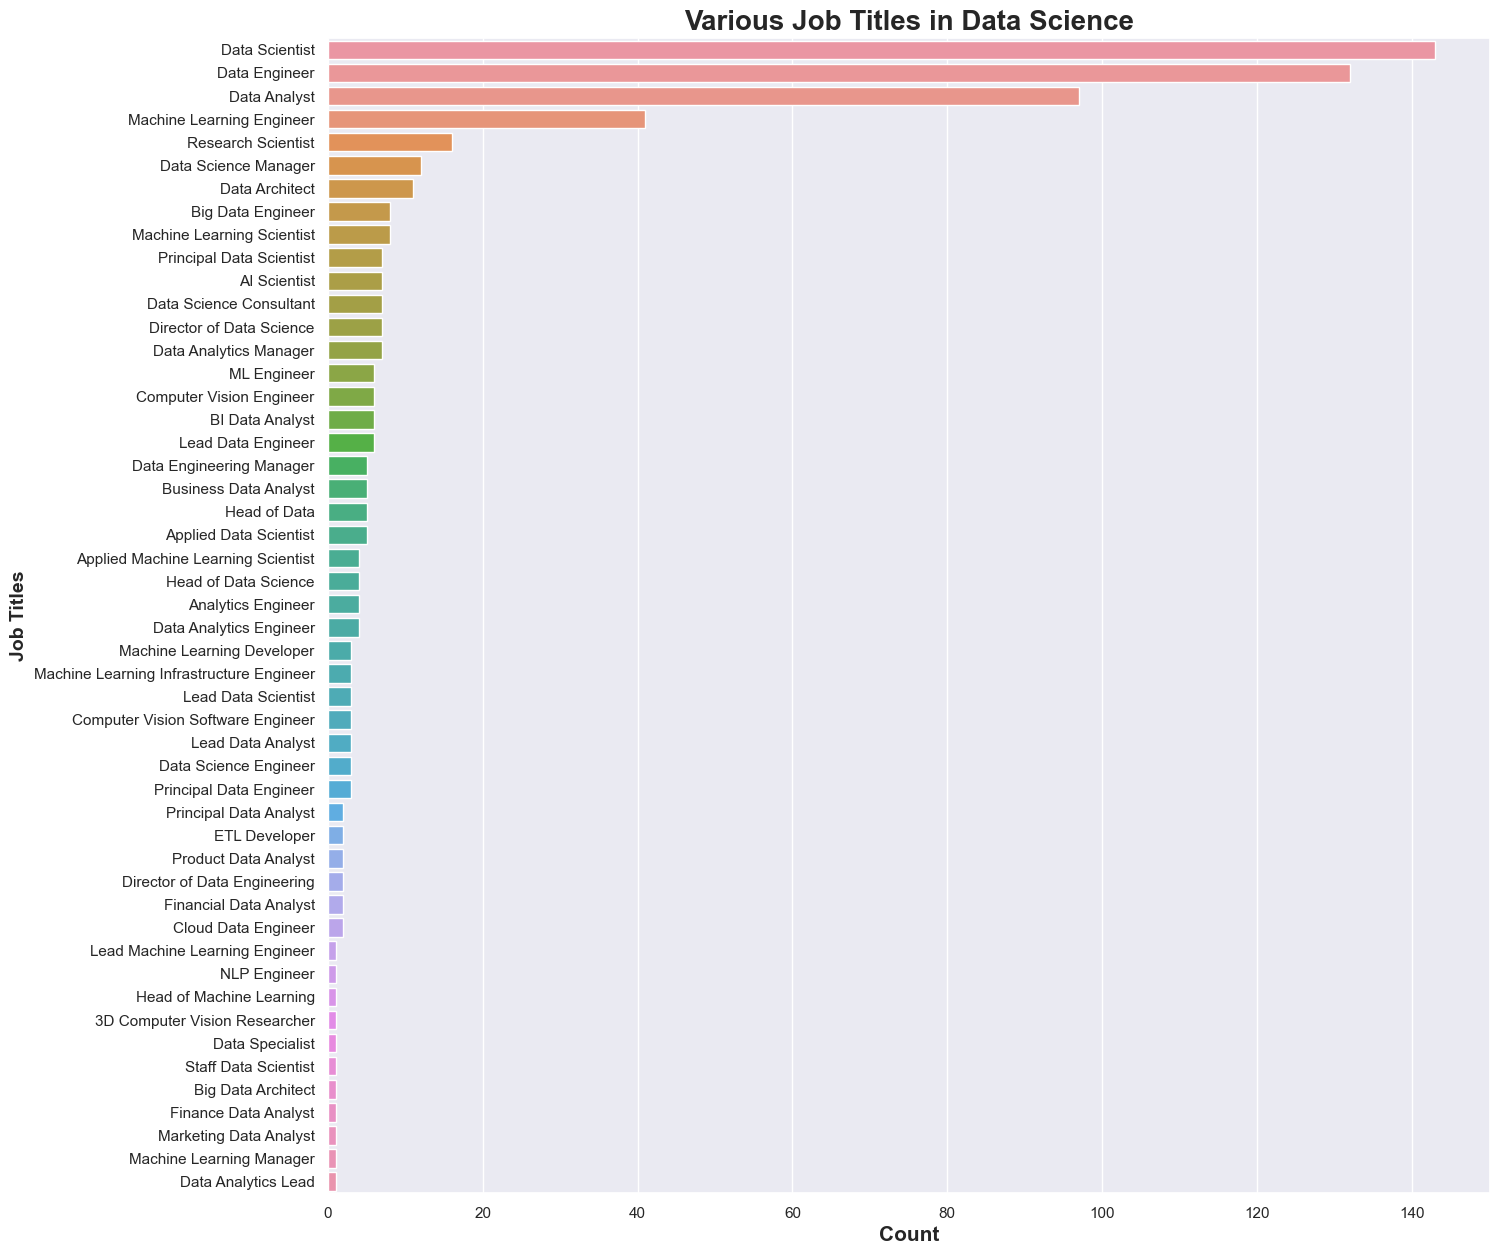

In [30]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=ds_data, order=ds_data['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=14, fontweight='bold')
plt.show()

In [31]:
# Percentage of Distribution by job title
(ds_data['job_title'].value_counts()/ds_data.shape[0]*100).round(2)

Data Scientist                              23.56
Data Engineer                               21.75
Data Analyst                                15.98
Machine Learning Engineer                    6.75
Research Scientist                           2.64
Data Science Manager                         1.98
Data Architect                               1.81
Big Data Engineer                            1.32
Machine Learning Scientist                   1.32
Principal Data Scientist                     1.15
AI Scientist                                 1.15
Data Science Consultant                      1.15
Director of Data Science                     1.15
Data Analytics Manager                       1.15
ML Engineer                                  0.99
Computer Vision Engineer                     0.99
BI Data Analyst                              0.99
Lead Data Engineer                           0.99
Data Engineering Manager                     0.82
Business Data Analyst                        0.82


In [32]:
ds_data['job_title'].nunique()

50

Text(0, 0.5, 'Count')

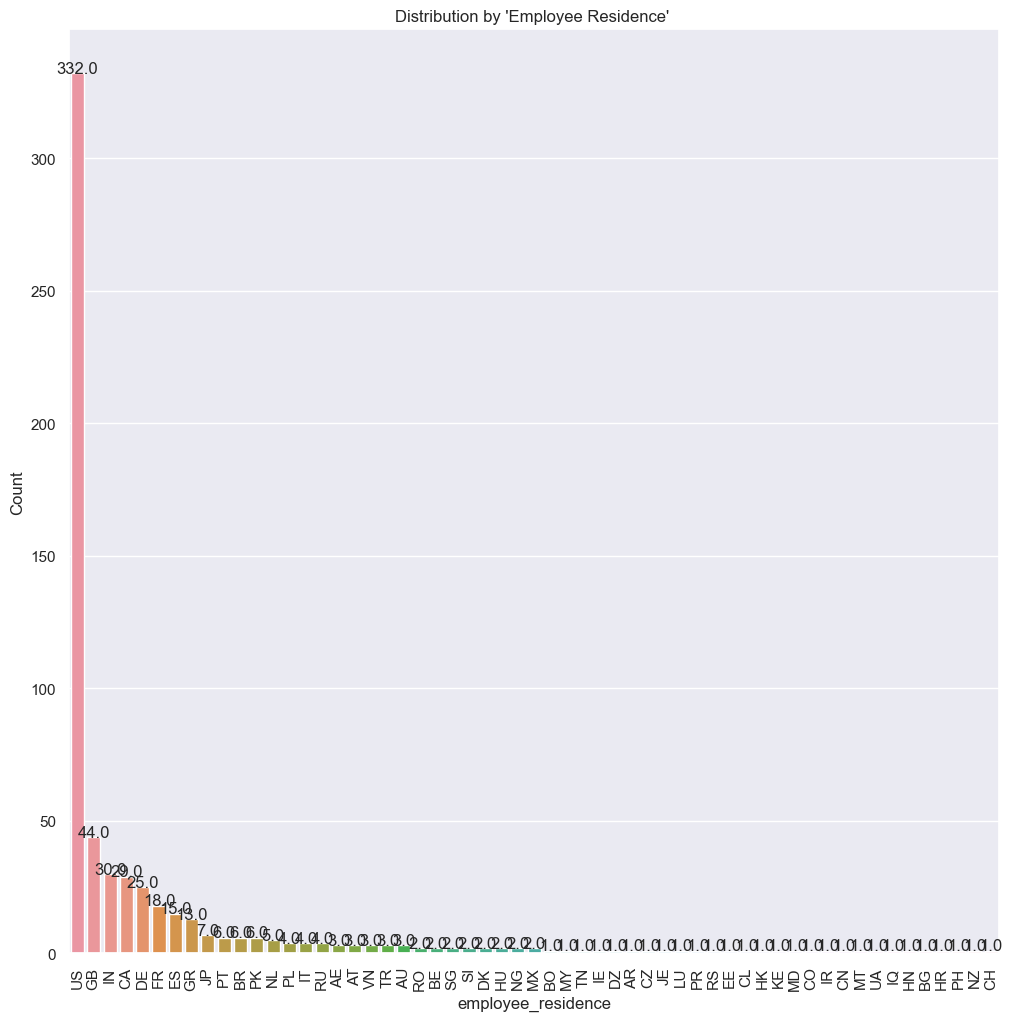

In [33]:
# Distribution of Employee Residence
fig, ax1 = plt.subplots(figsize = (12,12))
viz = sns.countplot(ax=ax1, x='employee_residence', data=ds_data, order=ds_data['employee_residence'].value_counts().index)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'Employee Residence' ")
plt.ylabel('Count')

Text(0, 0.5, 'COUNT')

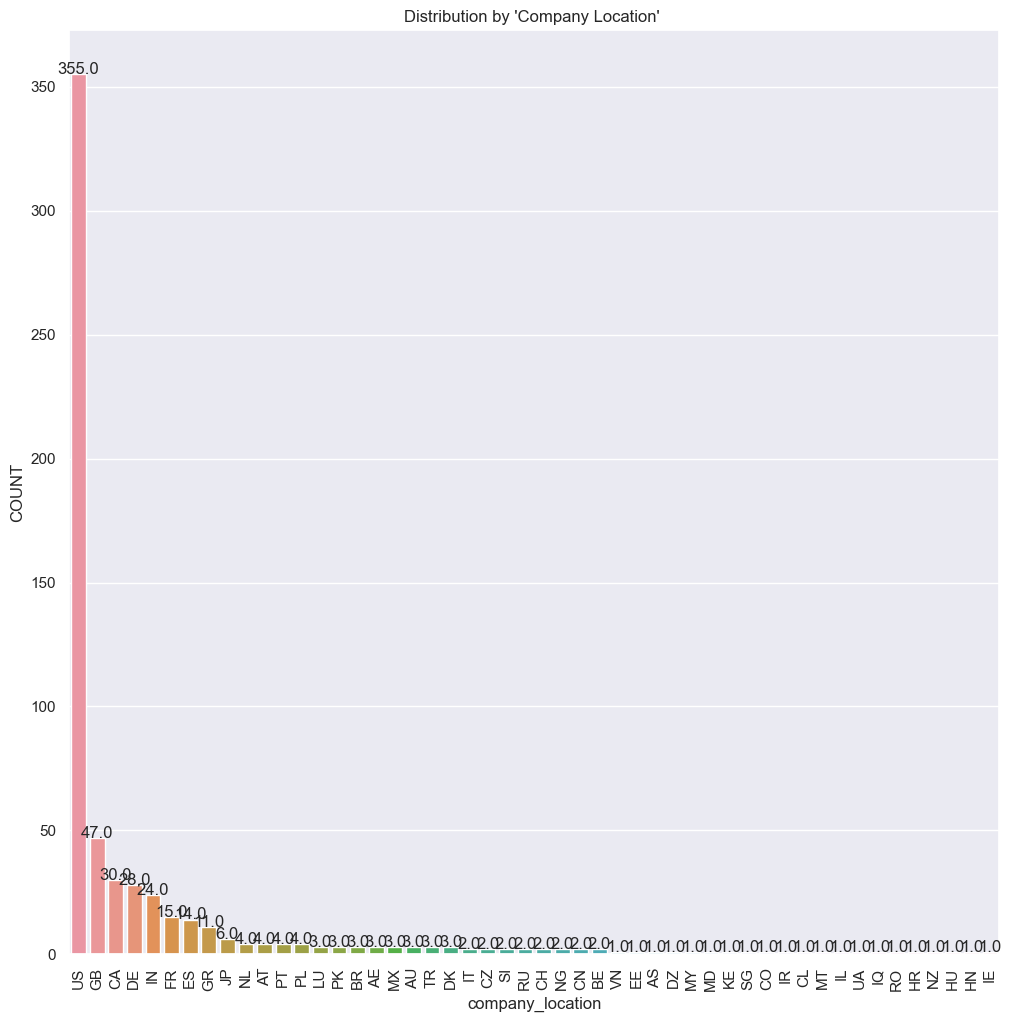

In [34]:
# Distribution of Company Location
fig, ax1 = plt.subplots(figsize = (12,12))
viz = sns.countplot(ax=ax1, x='company_location', data=ds_data, order=ds_data['company_location'].value_counts().index)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'Company Location' ")
plt.ylabel('COUNT')

Text(0, 0.5, 'Count')

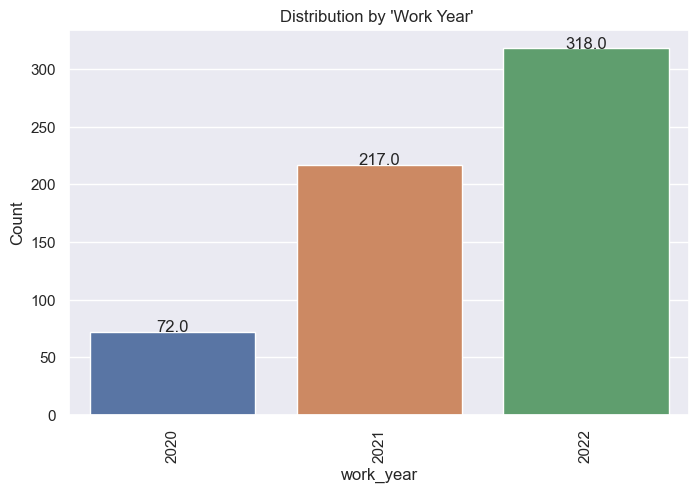

In [35]:
# Distribution of Work Year
fig, ax1 = plt.subplots(figsize = (8,5))
viz = sns.countplot(ax=ax1, x='work_year', data=ds_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution by 'Work Year' ")
plt.ylabel('Count')

In [36]:
# Rename Company Size
ds_data.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)

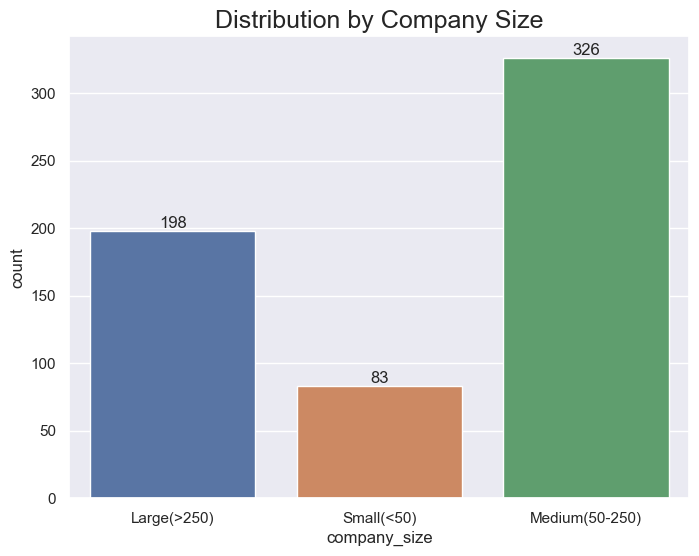

In [37]:
# Distribution of Company Size
plt.figure(figsize=(8,6))
plt.title('Distribution by Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=ds_data)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [38]:
# Percentage of Distribution by Company Size
(ds_data['company_size'].value_counts()/ds_data.shape[0]*100).round(2)

Medium(50-250)    53.71
Large(>250)       32.62
Small(<50)        13.67
Name: company_size, dtype: float64

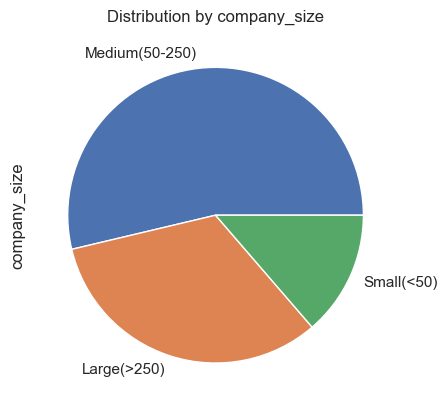

In [39]:
(ds_data['company_size'].value_counts()/ds_data.shape[0]*100).round(2).plot.pie()
plt.title('Distribution by company_size')
plt.show()


###  Distribution by Company Size

Medium sized companies takes the largest share of 54% of the dataset, while Large sized companies and Small sized companies account for 33% and 14% respectively.

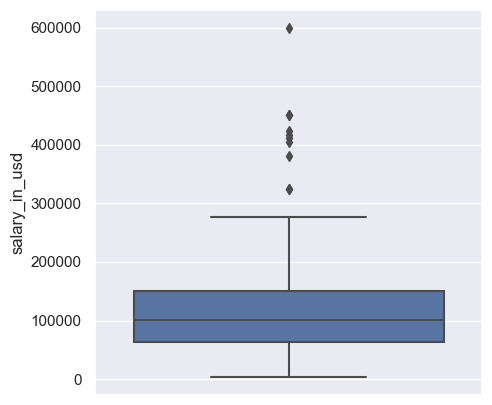

In [40]:
# Distribution of Salary In Usd

plt.figure(figsize=(5,5))
sns.boxplot(y='salary_in_usd', data=ds_data)
plt.show()

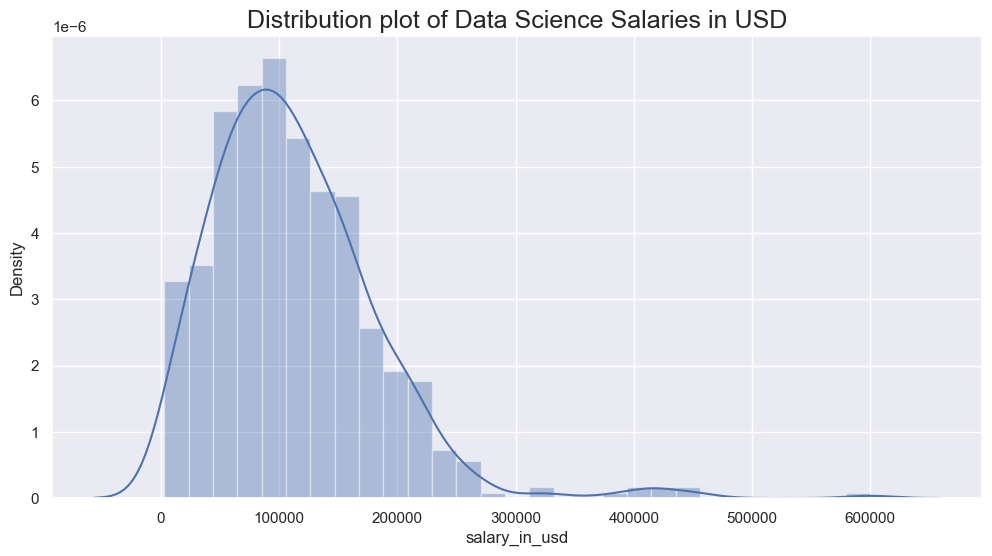

In [41]:
plt.figure(figsize=(12,6))
sns.distplot(ds_data['salary_in_usd'])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18)
plt.show()

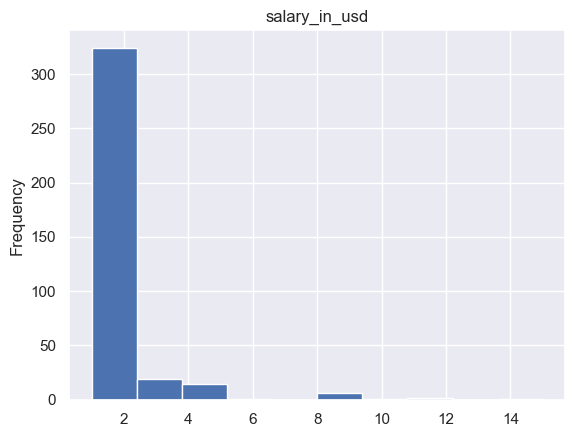

In [42]:
ds_data.salary_in_usd.value_counts().plot.hist()
plt.title('salary_in_usd')
plt.show()

<Axes: xlabel='salary_in_usd', ylabel='work_year'>

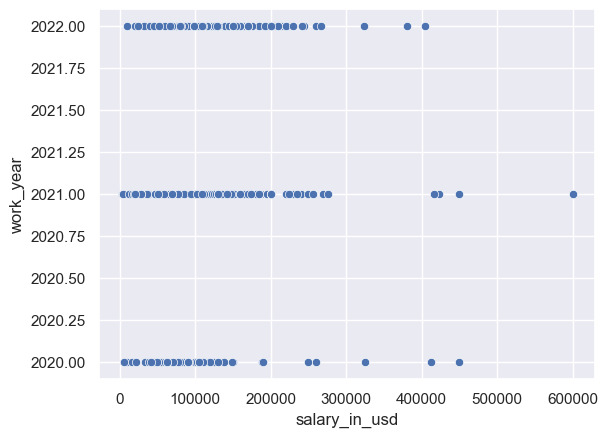

In [43]:
sns.scatterplot(x=ds_data['salary_in_usd'], y=ds_data['work_year'])

In [44]:
# Remote Ratio Distribution

# Rename Employment Type values
ds_data.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'}, inplace=True)

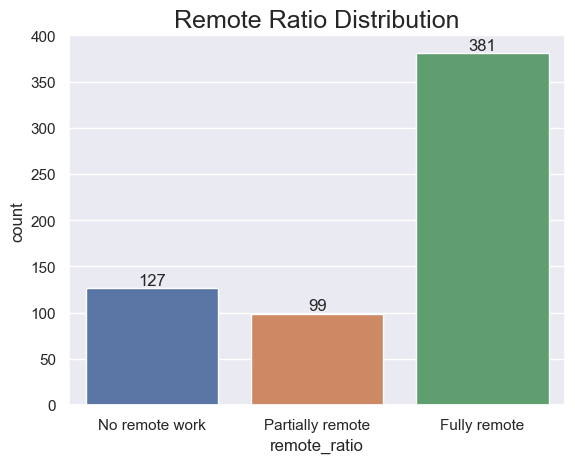

In [45]:
plt.title ('Remote Ratio Distribution', fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds_data)
for i in ax.containers:
    ax.bar_label(i)

In [46]:
# Percentage Distribution Of Remote Ratio
remote_perct = (ds_data['remote_ratio'].value_counts()/ds_data.shape[0]*100).round(2)
remote_perct

Fully remote        62.77
No remote work      20.92
Partially remote    16.31
Name: remote_ratio, dtype: float64

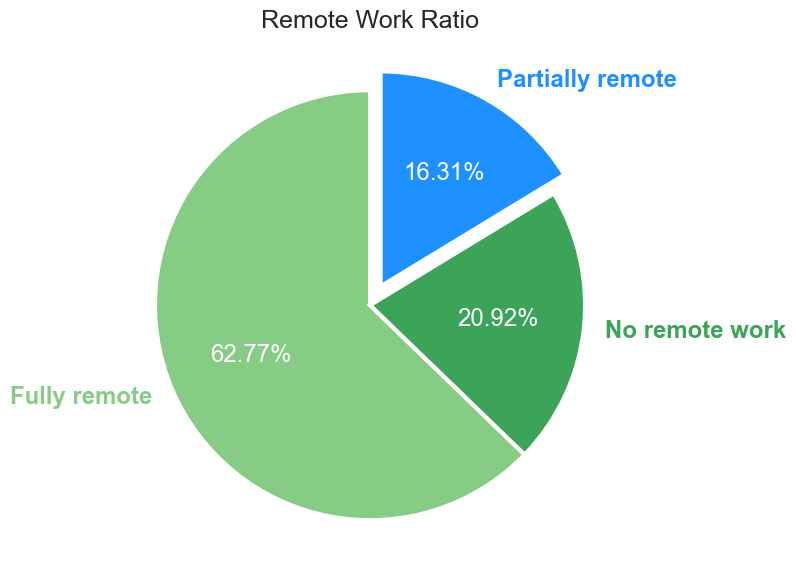

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

x=remote_perct

cmap = plt.get_cmap('Greens')
colors = list(cmap(np.linspace(0.45,0.85, len(x))))

colors[2]='dodgerblue'
labels = ['Fully remote','No remote work','Partially remote']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the wedge to highlight it.
    explode=(0, 0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Remote Work Ratio', fontsize=18)
plt.tight_layout()

<Axes: xlabel='company_location', ylabel='experience_level'>

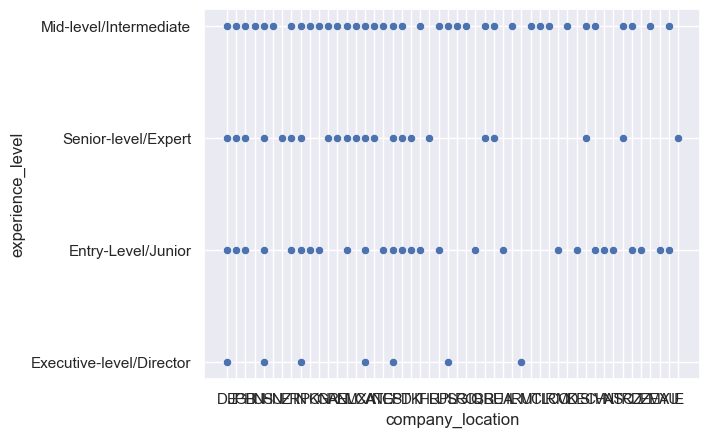

In [48]:
sns.scatterplot(x=ds_data['company_location'], y=ds_data['experience_level'])

### Multivariate Analysis

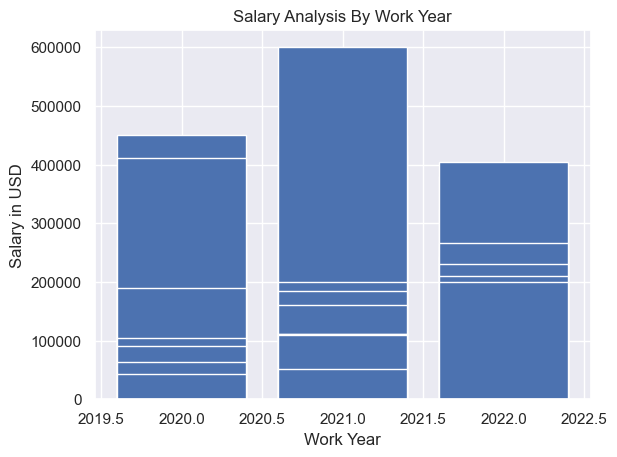

In [49]:
# Analysis of Salary in usd by Work Year

salary_in_usd = ds_data['salary_in_usd'].values
work_year = ds_data['work_year'].values

plt.title('Salary Analysis By Work Year')
plt.bar(x=work_year, height =salary_in_usd)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

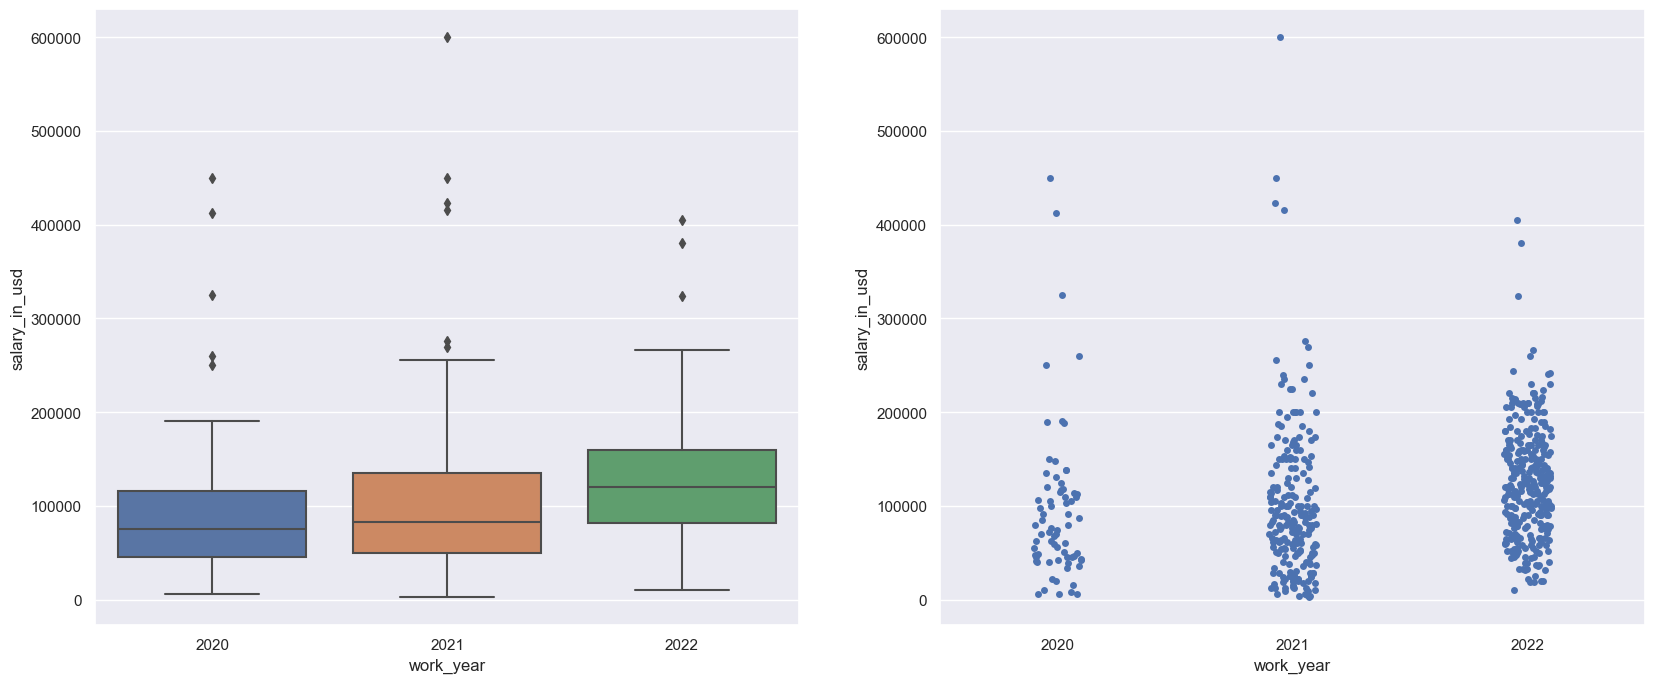

In [50]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='work_year',y='salary_in_usd', data=ds_data)
sns.stripplot(ax=axes[1],x='work_year',y='salary_in_usd', data=ds_data)

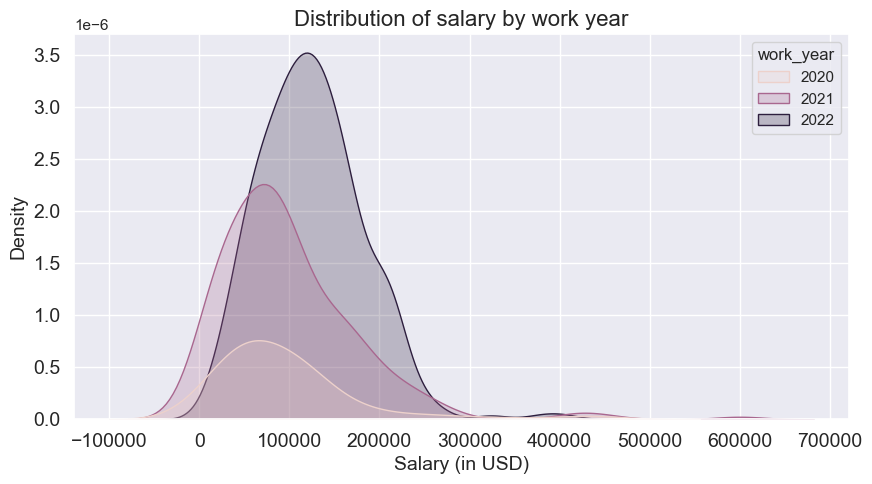

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_data, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

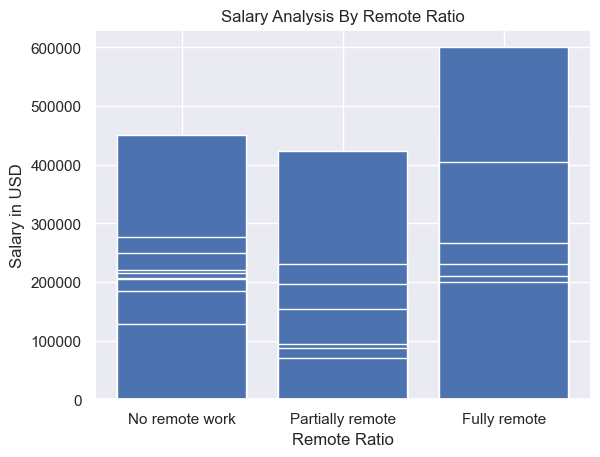

In [52]:
# Analysis of Salary in usd by Remote Ratio

salary_in_usd = ds_data['salary_in_usd'].values
remote_ratio = ds_data['remote_ratio'].values

plt.title('Salary Analysis By Remote Ratio')
plt.bar(x=remote_ratio, height =salary_in_usd)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

<Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>

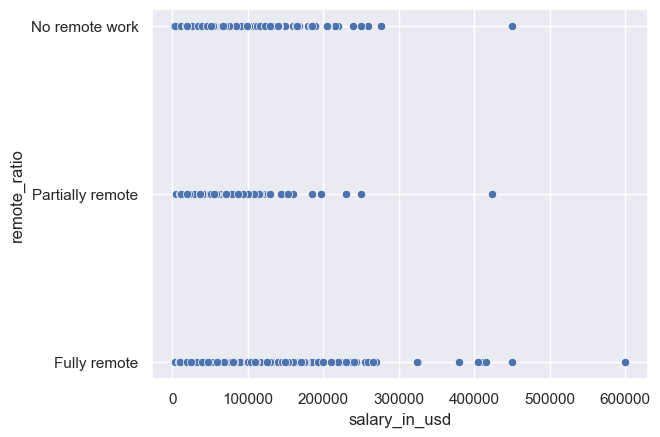

In [53]:
# What role did salary in usd play in remote ratio
sns.scatterplot(x=ds_data['salary_in_usd'], y=ds_data['remote_ratio'])

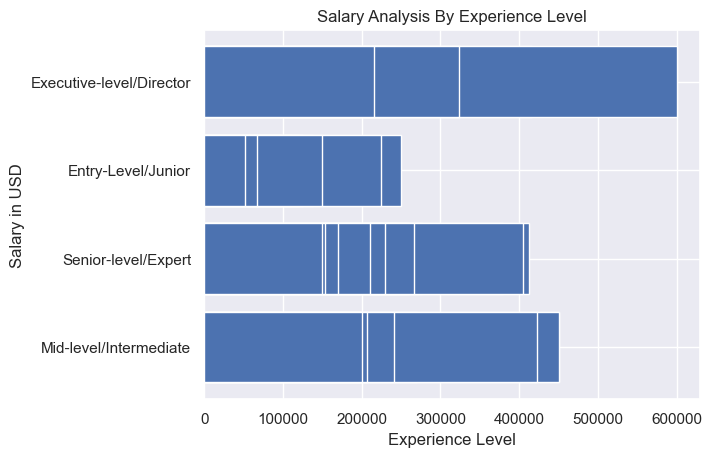

In [54]:
# Analysis of Salary in usd by Experience Level

salary_in_usd = ds_data['salary_in_usd'].values
experience_level = ds_data['experience_level'].values

plt.title('Salary Analysis By Experience Level')
plt.barh(y=experience_level, width=salary_in_usd)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

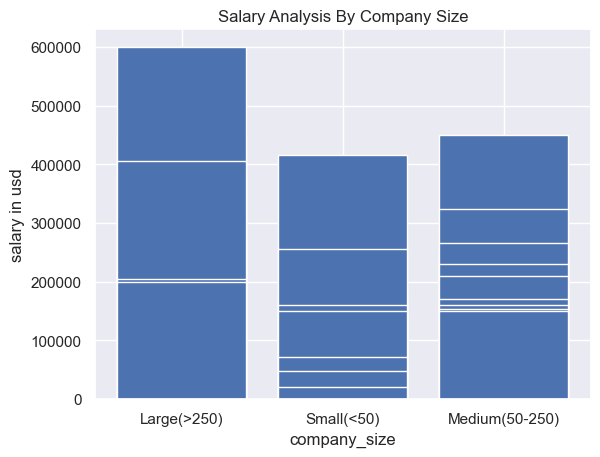

In [55]:
# Analysis of Salary in usd by Company Size

salary_in_usd = ds_data['salary_in_usd'].values
company_size = ds_data['company_size'].values

plt.title('Salary Analysis By Company Size')
plt.bar(x=company_size, height=salary_in_usd)
plt.xlabel('company_size')
plt.ylabel('salary in usd')
plt.show()

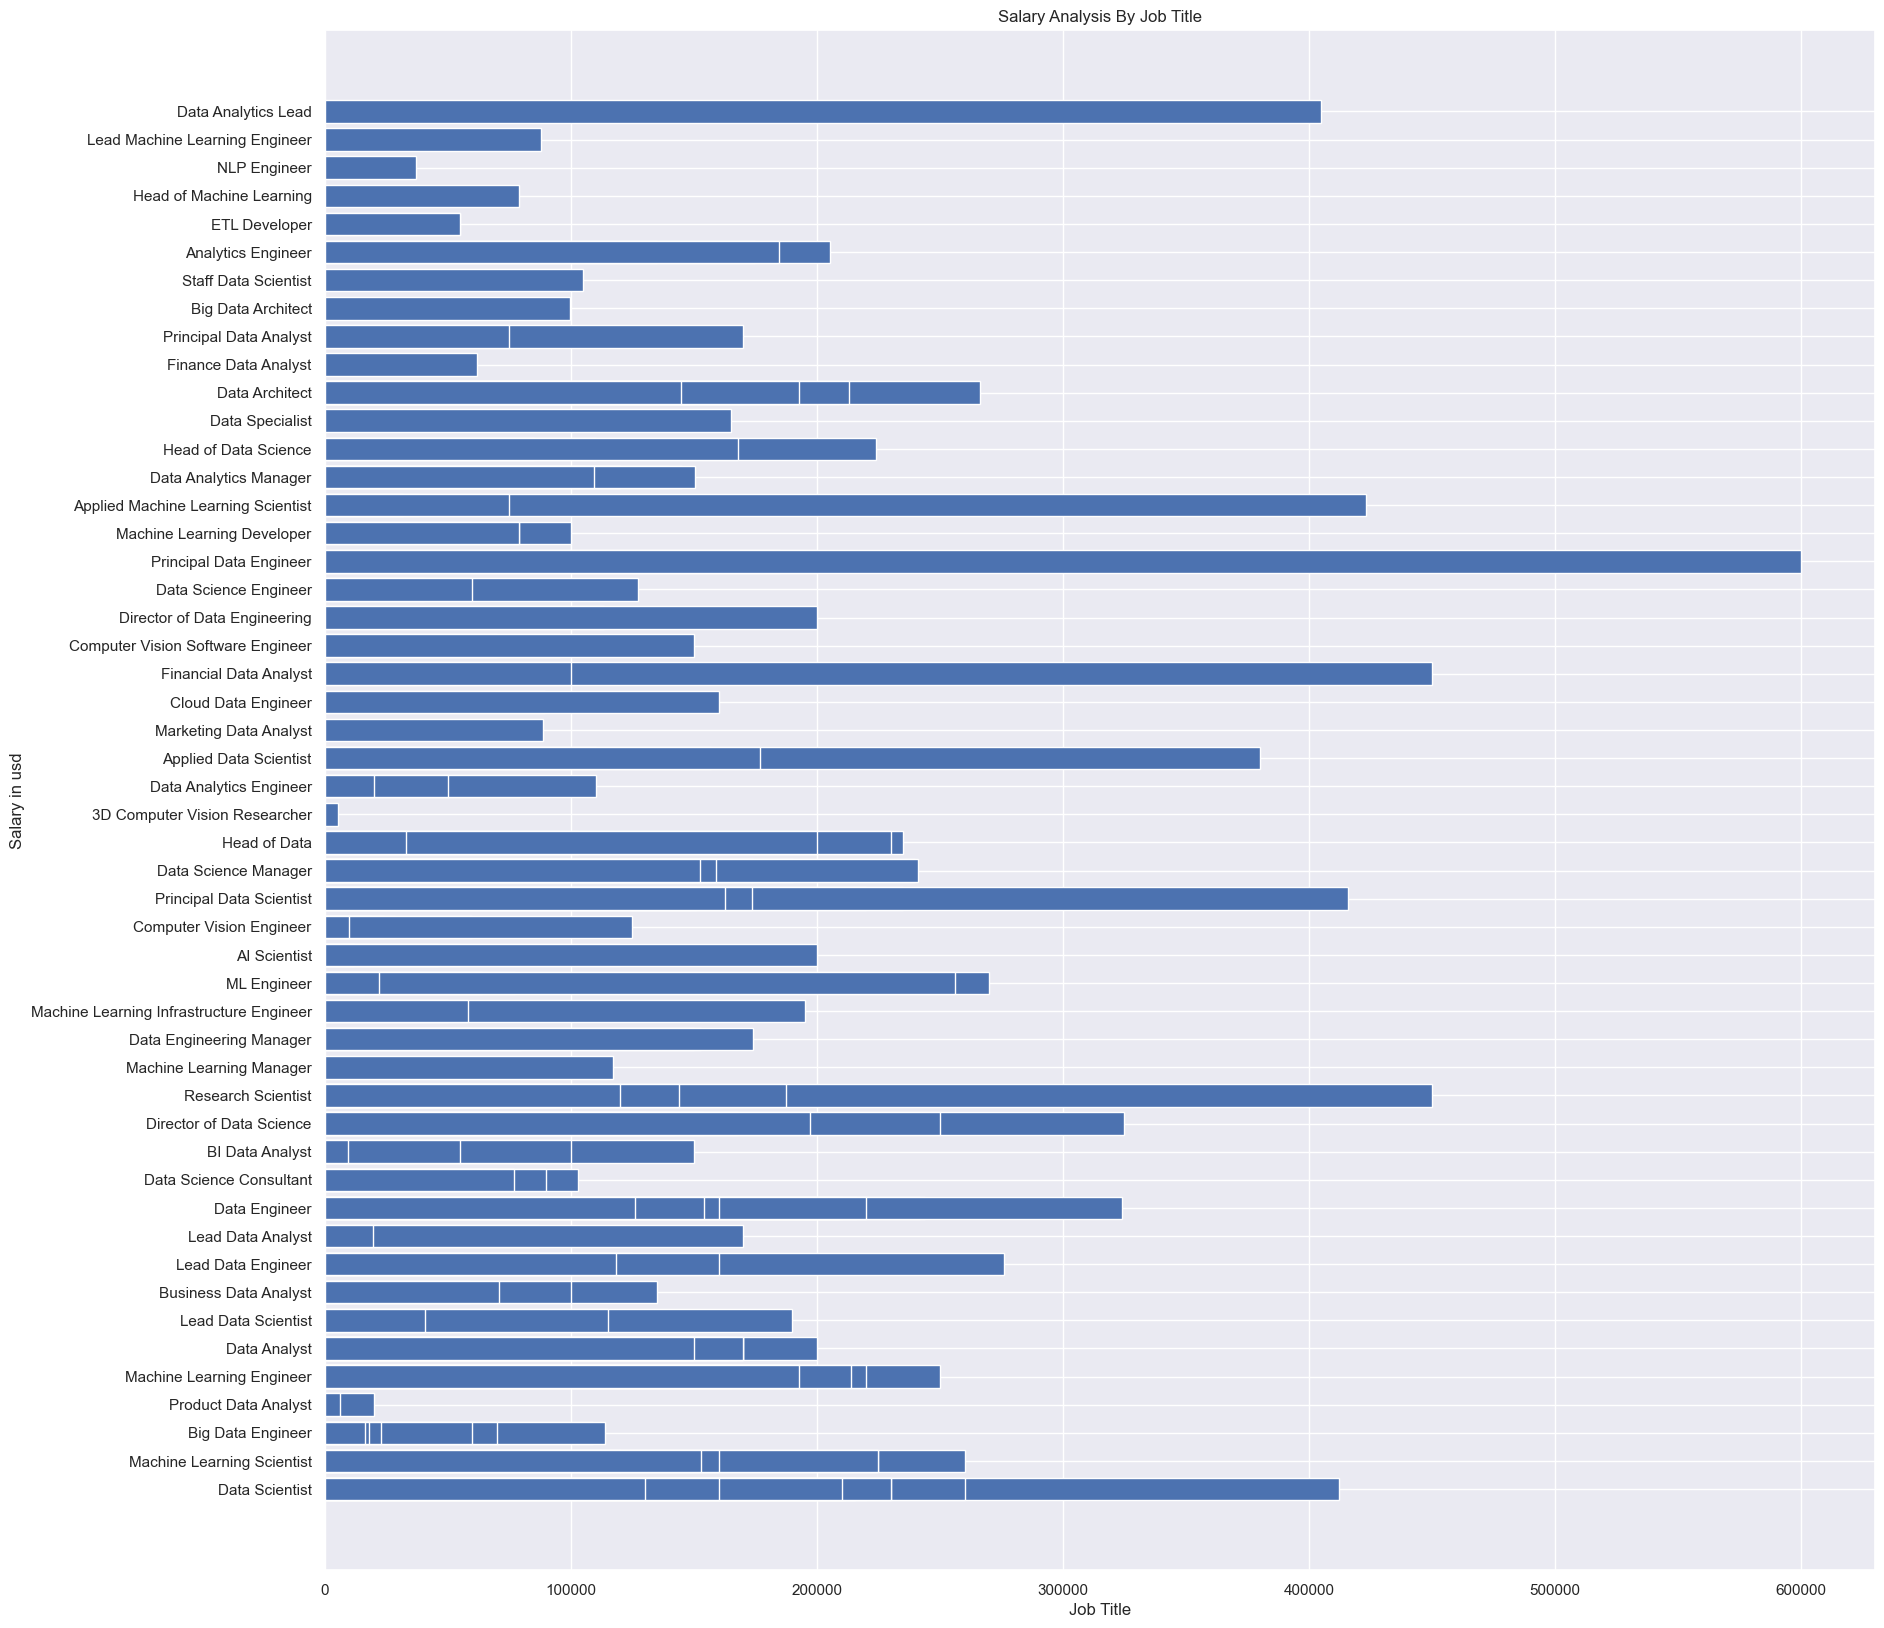

In [56]:
# Analysis of Salary in usd by Job Title

salary_in_usd = ds_data['salary_in_usd'].values
job_title = ds_data['job_title'].values
plt.figure(figsize=(20,20))
plt.title('Salary Analysis By Job Title')
plt.barh(y=job_title, width=salary_in_usd)
plt.xlabel('Job Title')
plt.ylabel('Salary in usd')
plt.show()

In [57]:
highest_salary = pd.pivot_table(data=ds_data,values=['salary_in_usd'],index=['job_title'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending = False)
display(highest_salary)


,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


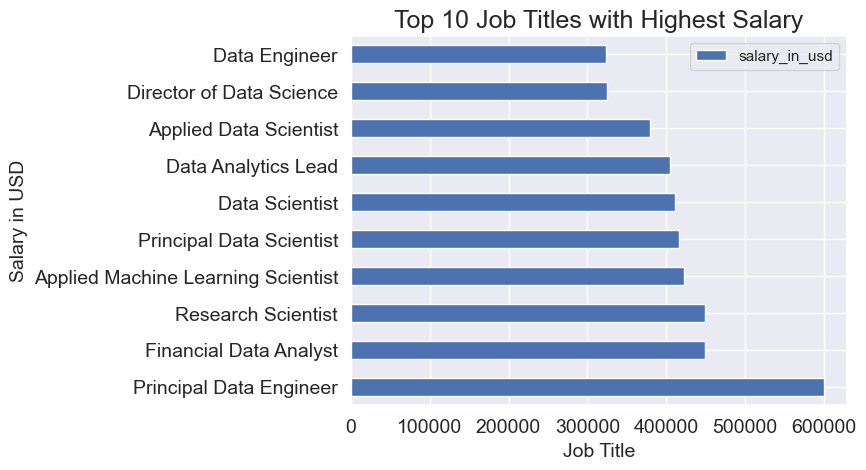

In [58]:
highest_salary.head(10).plot.barh()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

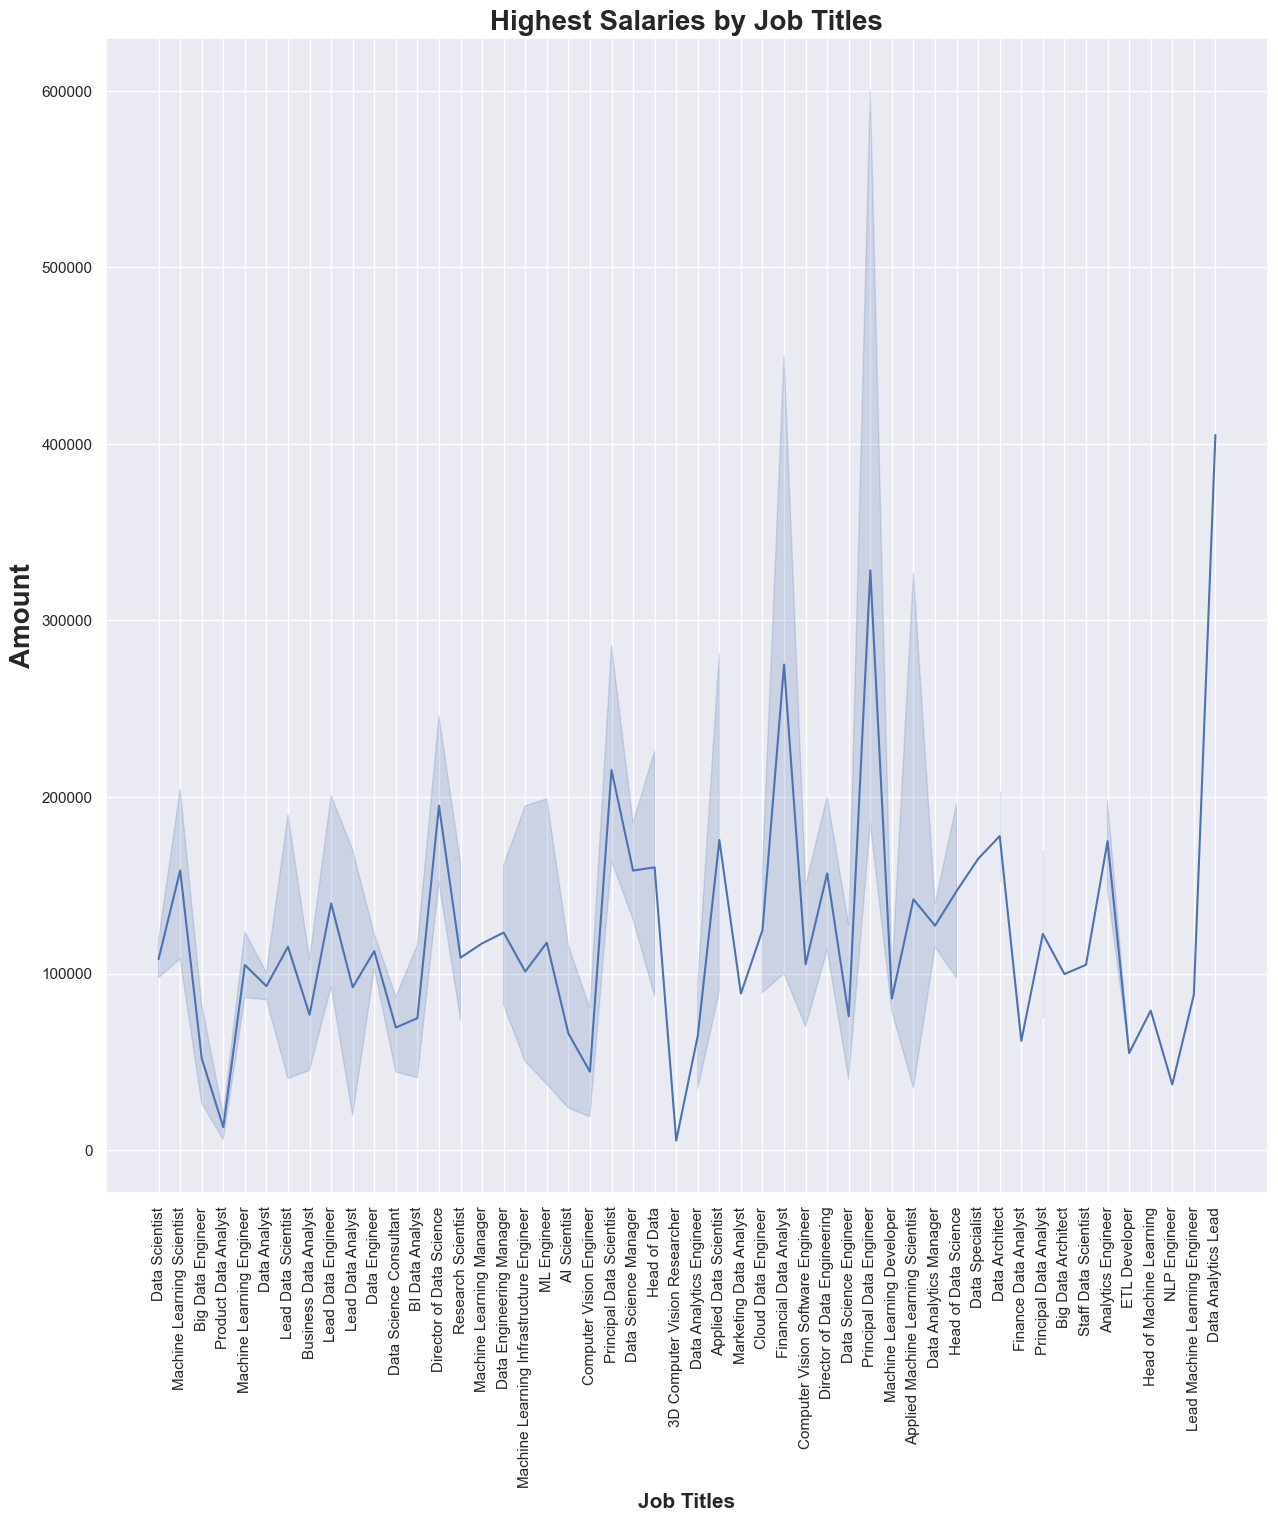

In [59]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=ds_data)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [60]:
# Salary by Company Location
location_sal = pd.pivot_table(data=ds_data,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
location_sal

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


<Axes: ylabel='company_location'>

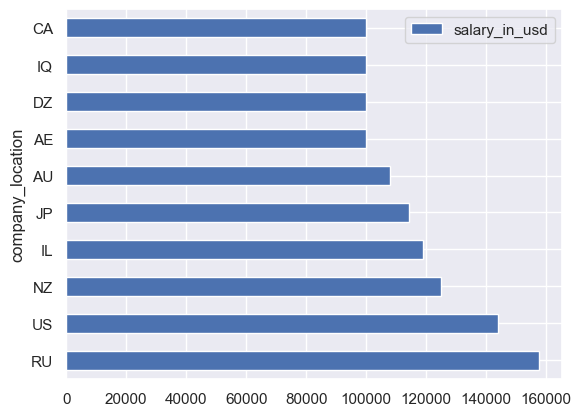

In [61]:
location_sal.head(10).plot.barh()

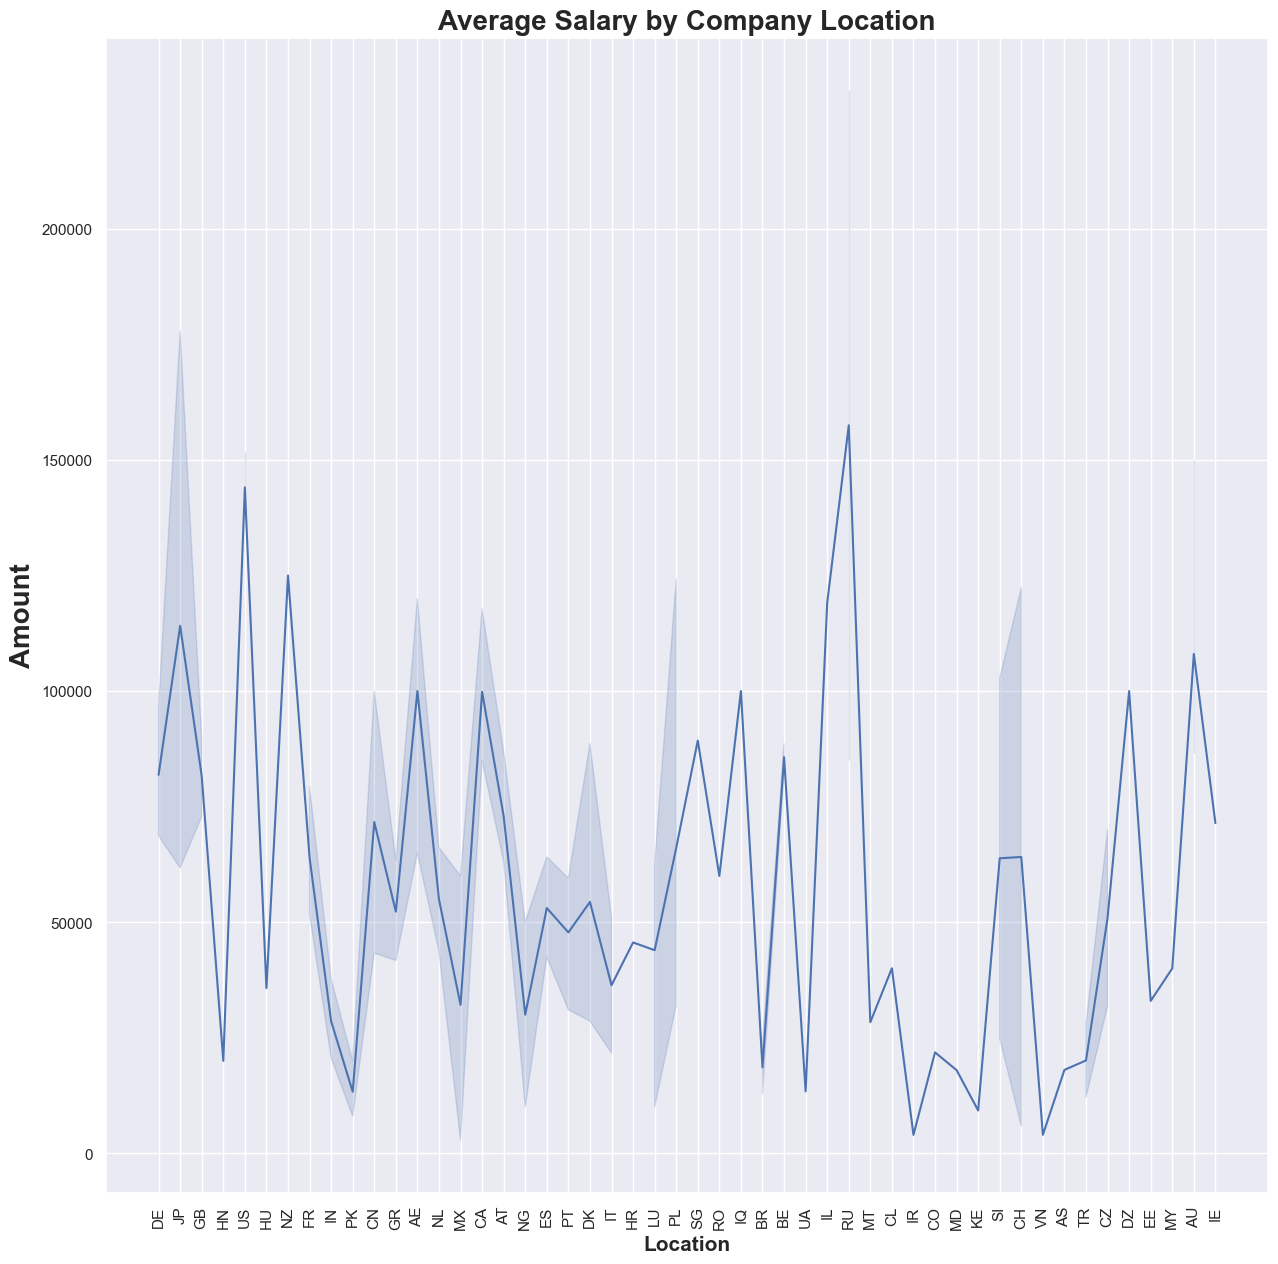

In [62]:
plt.figure(figsize=(15,15))
plt.title('Average Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=ds_data)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

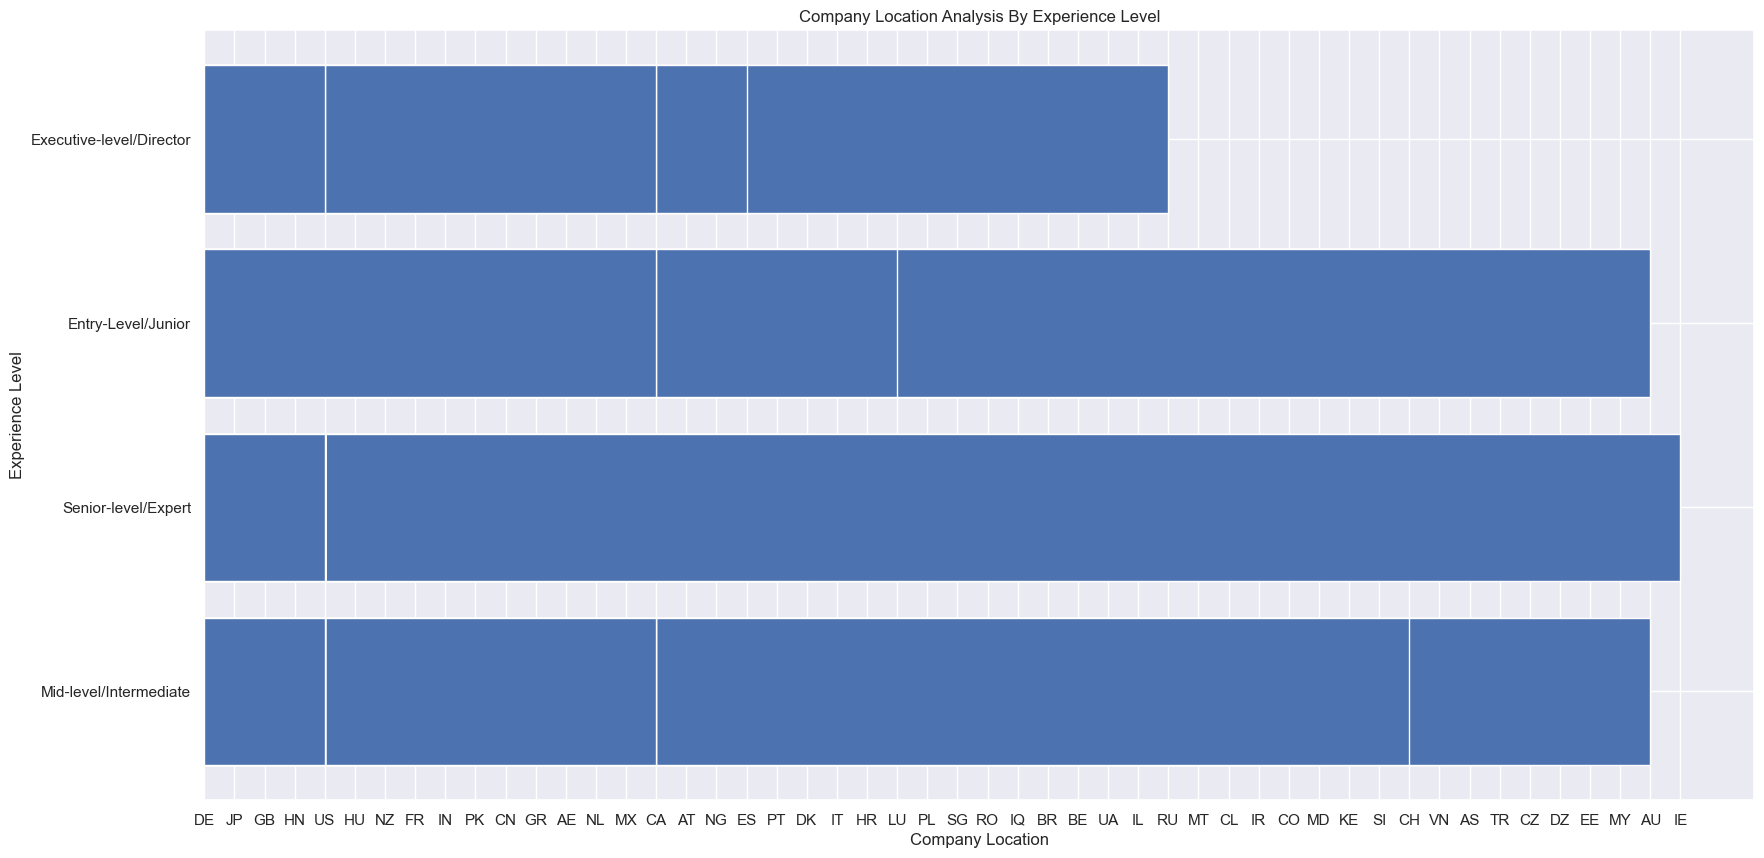

In [63]:
# Analysis of Company Location  by Experience Level

company_location = ds_data['company_location'].values
experience_level = ds_data['experience_level'].values
plt.figure(figsize=(20,10))
plt.title('Company Location Analysis By Experience Level')
plt.barh(y=experience_level, width=company_location)
plt.xlabel('Company Location')
plt.ylabel('Experience Level')
plt.show()

Text(0, 0.5, 'Count')

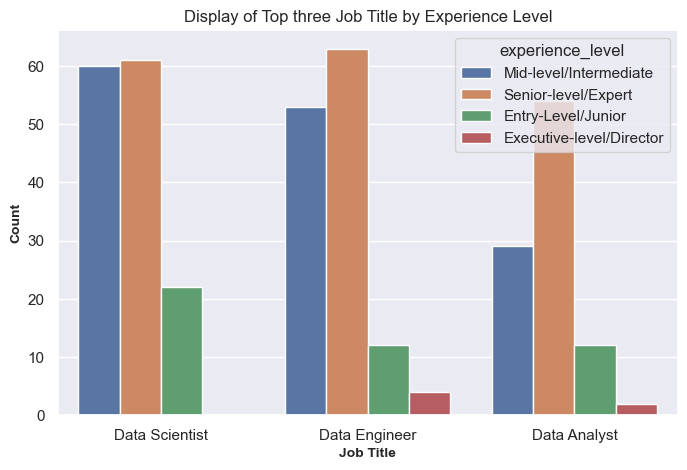

In [64]:
# Top 3 Job Title by Experience level
plt.figure(figsize=(8,5))
plt.title('Display of Top three Job Title by Experience Level', fontsize=12,)
sns.countplot(x='job_title', hue='experience_level', data=ds_data, order=ds_data['job_title'].value_counts().iloc[:3].index)
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')


In [65]:
 ds_data['job_title'].value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

Text(0, 0.5, 'Count')

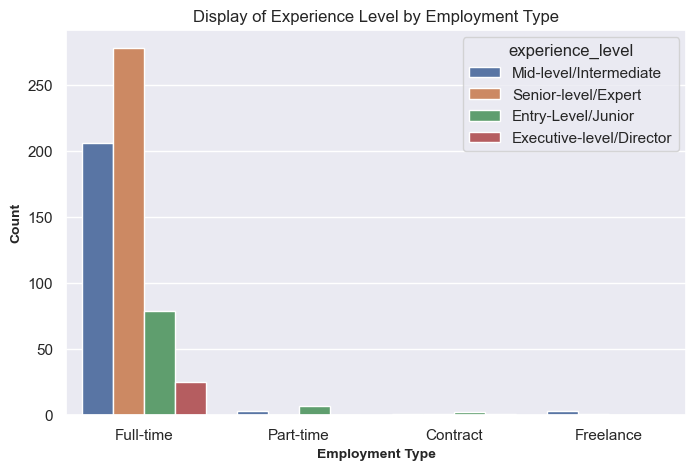

In [66]:
# Experience level Analysis with Employment type
plt.figure(figsize=(8,5))
plt.title('Display of Experience Level by Employment Type', fontsize=12,)
sns.countplot(x='employment_type', hue='experience_level', data=ds_data, order=ds_data['employment_type'].value_counts().iloc[:].index)
plt.xlabel('Employment Type', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')


In [67]:
# Employment Type by Experience Level
pd.crosstab(ds_data['employment_type'],ds_data['experience_level'])

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
employment_type,,,,
Contract,2,1,1,1
Freelance,0,0,3,1
Full-time,79,25,206,278
Part-time,7,0,3,0


Text(0, 0.5, 'Count')

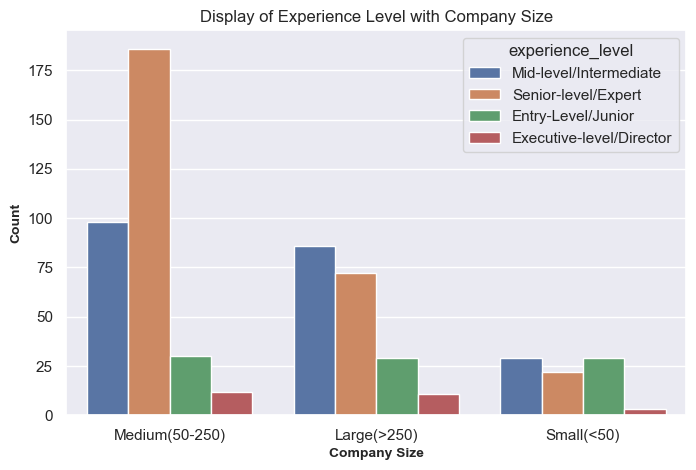

In [68]:
# Experience level Analysis with Company size
plt.figure(figsize=(8,5))
plt.title('Display of Experience Level with Company Size', fontsize=12,)
sns.countplot(x='company_size', hue='experience_level', data=ds_data, order=ds_data['company_size'].value_counts().iloc[:].index)
plt.xlabel('Company Size', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')


<Axes: xlabel='remote_ratio', ylabel='work_year'>

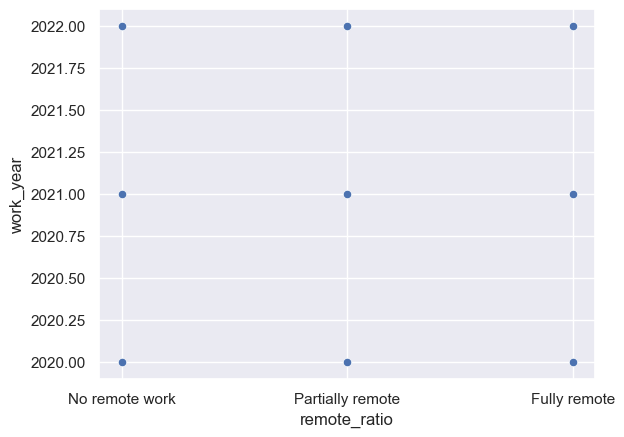

In [69]:
# Analysis Of Remote Ratio by Work Year
sns.scatterplot(x='remote_ratio', y='work_year', data=ds_data)

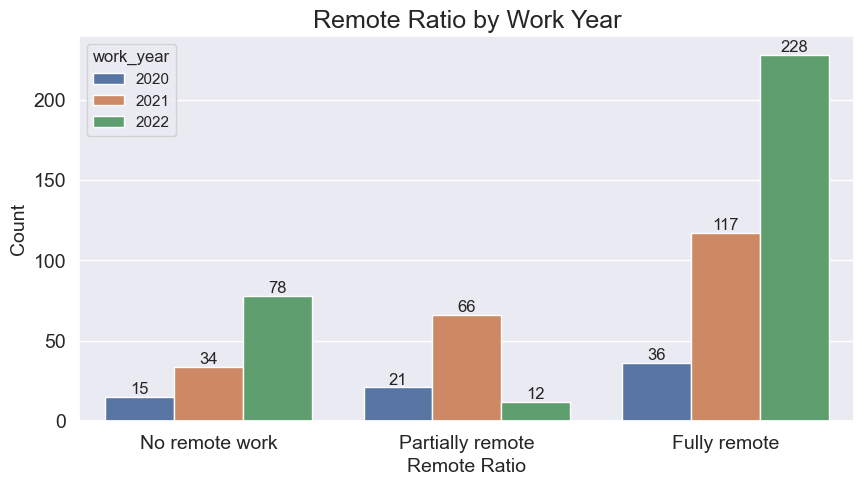

In [70]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds_data, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()